<a href="https://colab.research.google.com/github/vneumannufprbr/Computer-Vision/blob/main/FashionMNISTSeqyCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Sequencial

1. Cargar Datos:

In [30]:
import keras
keras.datasets.fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [31]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

2. Pre-procesar y dividir Entrenamiento en Entrenamiento y Validación:
Normalizar los píxeles de 0-255 a 0-1.

In [32]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [33]:
from sklearn.model_selection import train_test_split

# Divide el conjunto de entrenamiento original en entrenamiento y validación
train_images_split, val_images, train_labels_split, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

print("Dimensiones del nuevo conjunto de entrenamiento:", train_images_split.shape)
print("Dimensiones del nuevo conjunto de validación:", val_images.shape)
print("Dimensiones de las etiquetas del nuevo conjunto de entrenamiento:", train_labels_split.shape)
print("Dimensiones de las etiquetas del nuevo conjunto de validación:", val_labels.shape)

Dimensiones del nuevo conjunto de entrenamiento: (48000, 28, 28)
Dimensiones del nuevo conjunto de validación: (12000, 28, 28)
Dimensiones de las etiquetas del nuevo conjunto de entrenamiento: (48000,)
Dimensiones de las etiquetas del nuevo conjunto de validación: (12000,)


3. Construir Modelo (Sequential):

In [34]:
from keras import layers
import keras

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4. Compilar Modelo:

In [35]:
optimizer='adam'
loss='sparse_categorical_crossentropy'
metrics=['accuracy']


In [36]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

5. Entrenar y graficar datos para validación

In [37]:
model.fit(train_images_split, train_labels_split, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7711 - loss: 0.6655 - val_accuracy: 0.8427 - val_loss: 0.4344
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8548 - loss: 0.4019 - val_accuracy: 0.8476 - val_loss: 0.4127
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8724 - loss: 0.3474 - val_accuracy: 0.8652 - val_loss: 0.3722
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8821 - loss: 0.3155 - val_accuracy: 0.8742 - val_loss: 0.3437
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8903 - loss: 0.2973 - val_accuracy: 0.8750 - val_loss: 0.3484
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8957 - loss: 0.2824 - val_accuracy: 0.8780 - val_loss: 0.3391
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9012 - loss: 0.2689 - val_accuracy: 0.8788 - val_loss: 0.3405
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9045 - loss: 0.2573

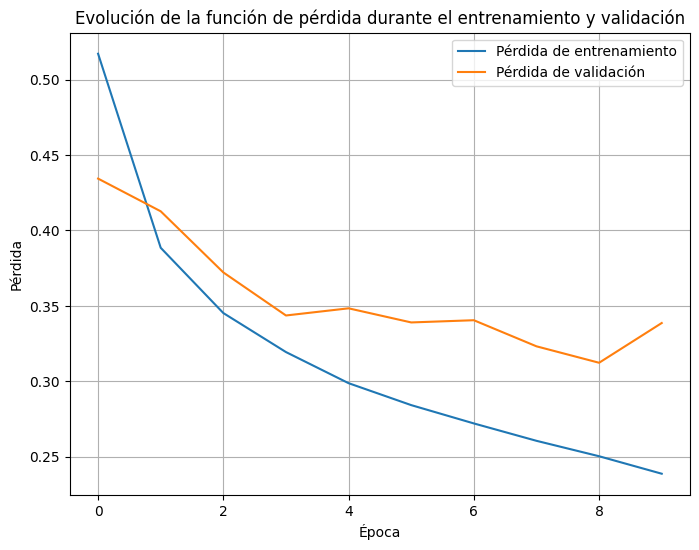

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(model.history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(model.history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la función de pérdida durante el entrenamiento y validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

6. Evaluar:

In [39]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8738 - loss: 0.3688


[0.368671178817749, 0.8722000122070312]

## Hacer predicciones

### Subtarea:
Usar el modelo entrenado para hacer predicciones sobre las imágenes de prueba.


Razonamiento: Usar el modelo entrenado para hacer predicciones sobre las imágenes de prueba y almacenarlas en una variable.



In [40]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


## Generar matriz de confusión y plotarla

### Subtarea:
Crear y mostrar una matriz de confusión para visualizar el rendimiento del clasificador en cada clase.


**Razonamiento:** Generar y visualizar la matriz de confusión para evaluar el rendimiento del modelo por clase.



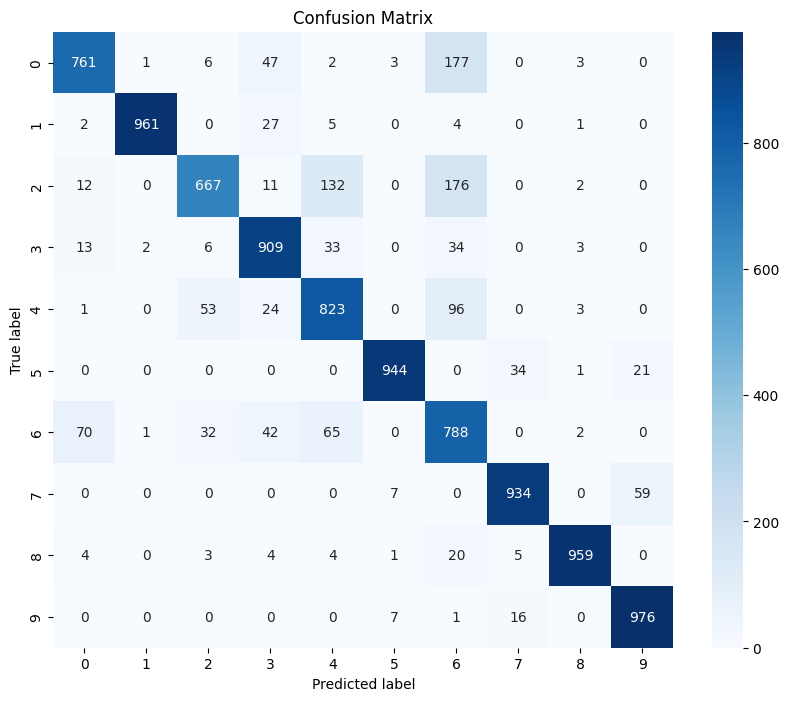

In [41]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Mostrar reporte de clasificación

### Subtarea:
Generar y mostrar un reporte de clasificación que incluya métricas como precisión, recall y F1-score para cada clase.


Razonamiento: Generar e imprimir el reporte de clasificación usando las etiquetas verdaderas y predichas.



In [42]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1000
           1       1.00      0.96      0.98      1000
           2       0.87      0.67      0.75      1000
           3       0.85      0.91      0.88      1000
           4       0.77      0.82      0.80      1000
           5       0.98      0.94      0.96      1000
           6       0.61      0.79      0.69      1000
           7       0.94      0.93      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



## Visualizar algunas predicciones

### Subtarea:
Mostrar algunas imágenes de prueba junto con sus etiquetas verdaderas y las predicciones del modelo.


**Razonamiento:** Seleccionar algunas imágenes de prueba y sus correspondientes etiquetas verdaderas y predicciones del modelo, luego crear una figura con subtramas para mostrarlas con títulos que indiquen las etiquetas verdaderas y predichas y sin marcas en los ejes.



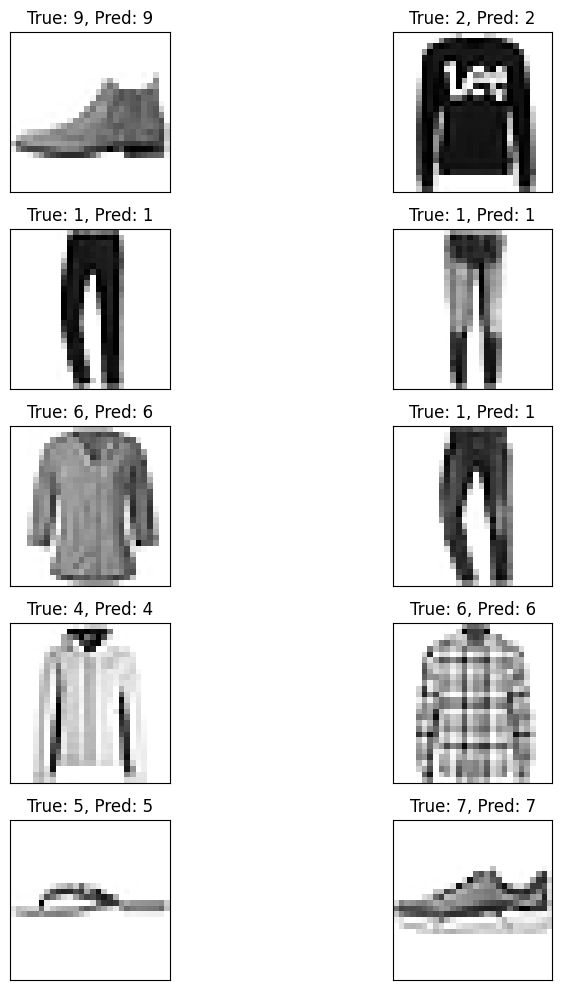

In [43]:
import matplotlib.pyplot as plt
import numpy as np

num_images_to_show = 10
plt.figure(figsize=(10, 10))
for i in range(num_images_to_show):
    plt.subplot(5, 2, i + 1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"True: {test_labels[i]}, Pred: {predicted_labels[i]}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

## Resumen:

### Hallazgos clave del análisis de datos

* El modelo entrenado se utilizó con éxito para hacer predicciones sobre las imágenes de prueba.
* Se generó y mostró una matriz de confusión, que muestra los recuentos de predicciones verdaderas positivas, verdaderas negativas, falsas positivas y falsas negativas para cada clase.
* Se generó un reporte de clasificación que proporciona precisión, recall y puntuación F1 para cada una de las 10 clases. La precisión general del modelo es de 0.87.
* El rendimiento del modelo varía entre las clases, con algunas clases mostrando mayor precisión y recall que otras.
* Se creó una visualización de 10 imágenes de prueba con sus etiquetas verdaderas y predichas, lo que permite una evaluación cualitativa del rendimiento del modelo en ejemplos individuales.

### Ideas o Próximos Pasos

* Investigar las clases con menor precisión y recall para comprender las posibles razones de la clasificación errónea (por ejemplo, desequilibrio de datos, similitud de características con otras clases).
* Considerar la implementación de técnicas como el aumento de datos o la exploración de diferentes arquitecturas de modelo para mejorar el rendimiento en las clases con puntuaciones más bajas.


# Modelo CNN

# Cambio de modelo Sequencial original a modelo CNN
Las celdas de código que tienen alguna codificación diferente entre el modelo Sequential original y el modelo CNN son las siguientes:

Celda DH1MvJCy-Chn (Original Sequential Model Definition): Esta celda definía el modelo Sequential con capas Flatten y Dense.
Celda 24c7e532 (CNN Model Definition): Esta celda fue modificada para definir el modelo CNN, reemplazando las capas Flatten y Dense iniciales por capas Conv2D y MaxPooling2D, y usando keras.Input como primera capa.
Celda 31f9b512 (Confusion Matrix and Classification Report for CNN): Aunque la lógica es similar a la generación de la matriz de confusión y reporte para el modelo Sequential, esta celda fue creada específicamente para evaluar y mostrar los resultados del modelo CNN después de su entrenamiento.

## Modificar la arquitectura del modelo

Reemplazar las capas Sequencials `Flatten` y `Dense` con capas convolucionales (`Conv2D`, `MaxPooling2D`) y una capa `Flatten` antes de las capas `Dense` finales.


In [44]:
from keras.layers import Conv2D, MaxPooling2D
import keras

model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)), # Use keras.Input as the first layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Compilar el modelo

### Subtarea:
Reutilizar el optimizador, la función de pérdida y las métricas existentes para compilar el nuevo modelo CNN.


In [45]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

## Entrenar el modelo

Entrenar el modelo CNN con los datos de entrenamiento y validación.


In [46]:
model.fit(train_images_split, train_labels_split, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7708 - loss: 0.6432 - val_accuracy: 0.8690 - val_loss: 0.3608
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 34ms/step - accuracy: 0.8786 - loss: 0.3344 - val_accuracy: 0.8808 - val_loss: 0.3182
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 37ms/step - accuracy: 0.9013 - loss: 0.2669 - val_accuracy: 0.8920 - val_loss: 0.2992
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - accuracy: 0.9120 - loss: 0.2369 - val_accuracy: 0.9013 - val_loss: 0.2651
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9220 - loss: 0.2076 - val_accuracy: 0.9047 - val_loss: 0.2620
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9331 - loss: 0.1768 - val_accuracy: 0.9032 - val_loss: 0.2637
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9396 - loss: 0.1575 - val_accuracy: 0.9063 - val_loss: 0.2685
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9487 -

**Reasoning**:
The task is to visualize the distribution of the 'price' column. A histogram is a suitable plot to show the distribution of a continuous variable.



## Compilar el modelo

### Subtarea:
Reutilizar el optimizador, la función de pérdida y las métricas existentes para compilar el nuevo modelo CNN.

In [47]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

## Entrenar el modelo

### Subtarea:
Entrenar el modelo CNN con los datos de entrenamiento y validación.

In [48]:
model.fit(train_images_split, train_labels_split, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.9635 - loss: 0.0970 - val_accuracy: 0.9095 - val_loss: 0.3033
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9709 - loss: 0.0784 - val_accuracy: 0.9139 - val_loss: 0.3220
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9750 - loss: 0.0676 - val_accuracy: 0.9101 - val_loss: 0.3760
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9761 - loss: 0.0609 - val_accuracy: 0.9069 - val_loss: 0.3659
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9806 - loss: 0.0534 - val_accuracy: 0.9038 - val_loss: 0.4019
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9823 - loss: 0.0493 - val_accuracy: 0.9040 - val_loss: 0.4179
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9838 - loss: 0.0428 - val_accuracy: 0.9063 - val_loss: 0.4175
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9858 -

## Evaluar el modelo

### Subtask:
Evaluar el rendimiento del modelo CNN en el conjunto de datos de prueba.

**Reasoning**:
Evaluate the trained CNN model on the test dataset to measure its performance.

In [49]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9017 - loss: 0.5617
Test Loss: 0.5158
Test Accuracy: 0.9046


## Generar matriz de confusión y reporte de clasificación

### Subtarea:
Generar y mostrar una matriz de confusión y un reporte de clasificación para evaluar el rendimiento del modelo CNN.

**Reasoning**:
Generate the confusion matrix and classification report using the true and predicted labels from the test set to evaluate the CNN model's performance across different classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


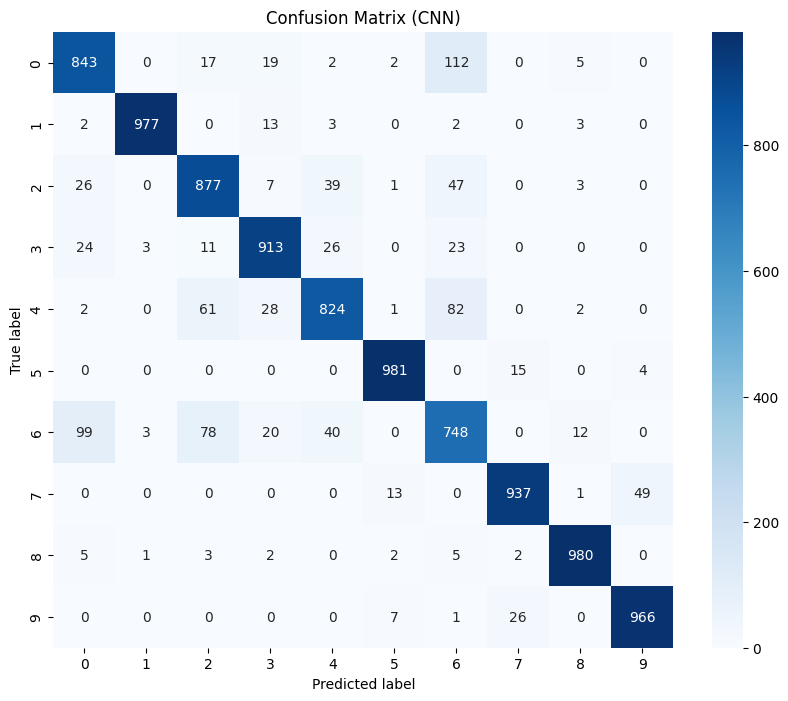


Classification Report (CNN):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.88      0.86      1000
           3       0.91      0.91      0.91      1000
           4       0.88      0.82      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.73      0.75      0.74      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [50]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Matriz de Confusión
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (CNN)')
plt.show()

# Reporte de Clasificación
print("\nClassification Report (CNN):")
print(classification_report(test_labels, predicted_labels))

## Visualizar algunas predicciones

### Subtarea:
Mostrar algunas imágenes de prueba junto con sus etiquetas verdaderas y las predicciones del modelo.

**Reasoning**:
Select some test images and their corresponding true and predicted labels, then create a figure with subplots to display them with titles indicating the true and predicted labels and without axis ticks.

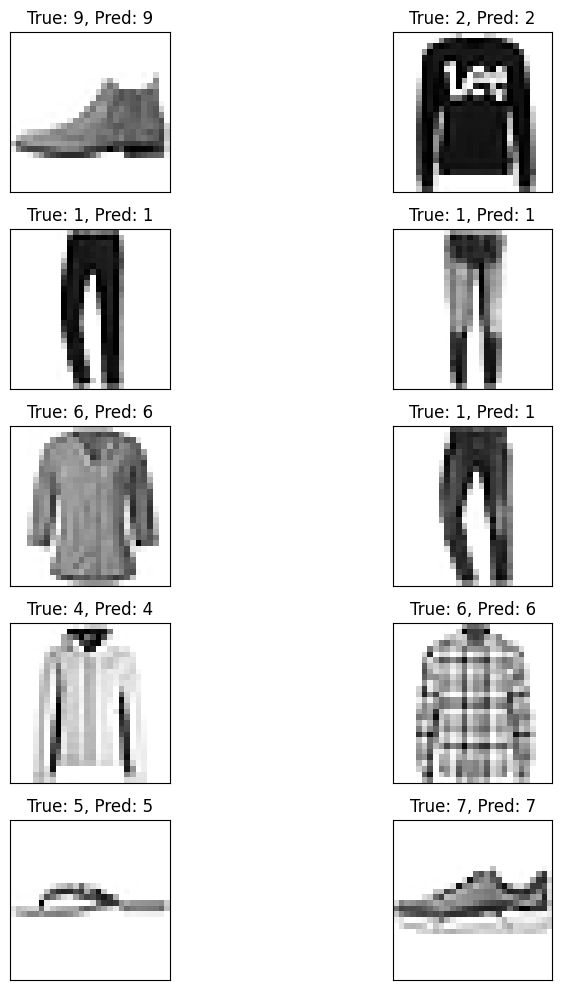

In [51]:
import matplotlib.pyplot as plt
import numpy as np

num_images_to_show = 10
plt.figure(figsize=(10, 10))
for i in range(num_images_to_show):
    plt.subplot(5, 2, i + 1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"True: {test_labels[i]}, Pred: {predicted_labels[i]}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# Benefícios del uso del CNN en relación al Sequential

El principal beneficio de usar una Red Neuronal Convolucional (CNN) en lugar de una red densamente conectada (Sequential con solo capas Flatten y Dense) para tareas como la clasificación de imágenes radica en la forma en que procesan los datos de imagen.

1. Captura de Características Espaciales: Las CNNs utilizan capas convolucionales (Conv2D) que aplican filtros a las imágenes. Estos filtros están diseñados para detectar patrones locales como bordes, esquinas y texturas en diferentes partes de la imagen. Una red densamente conectada simplemente trata cada píxel de la imagen de forma independiente después de aplanar la imagen, perdiendo la información sobre la estructura espacial y las relaciones entre píxeles cercanos.
2. Invarianza a la Traslación (Parcial): Las capas de pooling (MaxPooling2D, por ejemplo) en una CNN reducen la dimensionalidad de la representación espacial y ayudan a que el modelo sea menos sensible a la posición exacta de un patrón en la imagen. Esto significa que si un objeto (como una manga o un cuello de camisa) aparece en diferentes ubicaciones dentro de una imagen, la CNN aún puede reconocerlo. Una red densamente conectada pura no tiene esta capacidad inherente.
3. Reducción de Parámetros: Las capas convolucionales utilizan el concepto de "compartir pesos" (weight sharing). El mismo filtro se aplica a diferentes partes de la imagen, lo que reduce drásticamente el número de parámetros que el modelo necesita aprender en comparación con una red densamente conectada donde cada conexión tiene su propio peso único. Menos parámetros significan un modelo más eficiente y con menos probabilidades de sobreajuste, especialmente con datos de imagen de alta dimensionalidad.
4. Jerarquía de Características: Las CNNs construyen una jerarquía de características. Las primeras capas aprenden características de bajo nivel (bordes, texturas), mientras que las capas posteriores combinan estas características de bajo nivel para formar características de alto nivel (partes de objetos, objetos completos). Esta representación jerárquica es muy efectiva para tareas de reconocimiento visual.

En resumen, para tareas de clasificación de imágenes, las CNNs son mucho más efectivas porque están específicamente diseñadas para comprender la estructura espacial y las características de las imágenes, lo que les permite lograr un mejor rendimiento con menos recursos computacionales en comparación con las redes densamente conectadas para este tipo de datos. La mejora en la precisión que observaste al cambiar al modelo CNN es una clara evidencia de estos beneficios.